In [1]:
import matplotlib.pylab as plt 
import numpy as np 
import keras
import time
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Train Model on CPU

In [2]:
tf.config.set_visible_devices([], 'GPU')

# Fashion MNIST Load Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
assert x_train.shape==(60000,28,28)
assert x_test.shape==(10000,28,28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

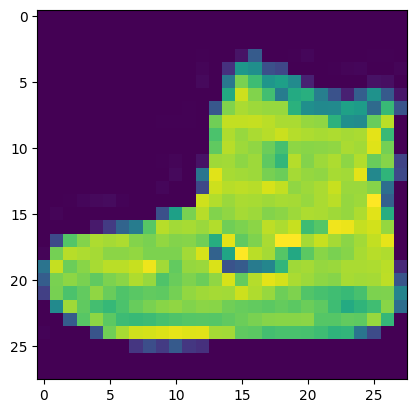

In [5]:
plt.imshow(x_train[0])

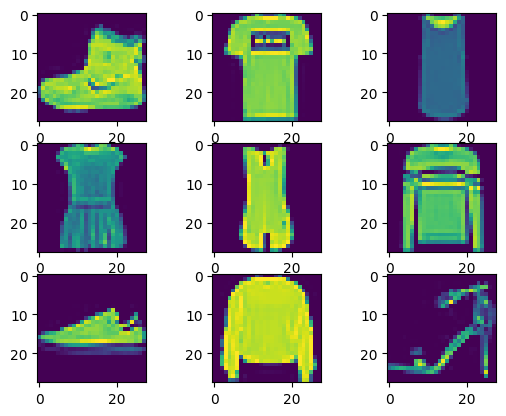

In [6]:
for i in range(9):
    pyplot.subplot(330+1+ i)
    pyplot.imshow(x_train[i])
pyplot.show()

# Preprocessing

In [7]:
# Reshape the training data into a form which can be easily 
# identified by the cnn model as corresponding to greyscale images.
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# reshape the y training and test data and use one hot encoding 
y_train=y_train.reshape(60000,1)
y_test=y_test.reshape(10000,1)
print(y_train.shape)
print(y_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(60000, 1)
(10000, 1)


# Model

In [9]:
model = Sequential()

model.add(Conv2D(64,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(28,28,1),
                 name='conv_1'))

model.add(MaxPooling2D(pool_size=(2,2),
                       name='max_pool_1'))

model.add(Conv2D(32,
                 kernel_size=3,
                 activation='relu',
                 name='conv_2'))

model.add(MaxPooling2D(pool_size=(2,2),
                       name='max_pool_2'))

model.add(Flatten(name='flatten'))

model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 13, 13, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 32)        18464     
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8010      
                                                                 
Total params: 27,114
Trainable params: 27,114
Non-traina

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## Training

In [12]:
s = time.time()

history = model.fit(x_train, 
                  y_train, 
                  epochs=10,
                  batch_size=128)

e = time.time()

m2_time = e - s

print("Total Training time on Apple Silicon GPU = {}".format(m2_time))

Epoch 1/10


2023-01-03 13:00:48.940284: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  7/469 [..............................] - ETA: 9s - loss: 21.9332 - accuracy: 0.1797 

2023-01-03 13:00:49.297086: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x28dc895f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-01-03 13:00:49.297099: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-01-03 13:00:49.302435: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-03 13:00:49.321601: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 10s 20ms/step - loss: 1.0923 - accuracy: 0.7504
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.4533 - accuracy: 0.8400
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.3981 - accuracy: 0.8572
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3623 - accuracy: 0.8685
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3449 - accuracy: 0.8747
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3223 - accuracy: 0.8819
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3082 - accuracy: 0.8872
Epoch 8/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2972 - accuracy: 0.8912
Epoch 9/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2871 - accuracy: 0.8941
Epoch 10/10
469/469 [==============================] - 11s 22ms/step - loss: 0.2797 - accuracy:

In [13]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Loss on running test : ', score[0])
print('Accuracy on running test : ', score[1])

Loss on running test :  0.35443314909935
Accuracy on running test :  0.8779000043869019
